Importing pandas and playground dataset

In [1]:
import pandas as pd
import numpy as np
play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
play.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


Pivoting Data

In [2]:
##neighborhood=play.groupby("neighborhood").count()
neighborhood=play['neighborhood'].value_counts().sort_values(ascending=False)
neighborhood

Squirrel Hill South    32
Beechview              21
Allegheny Center       15
South Side Slopes      14
Sheraden               13
                       ..
Esplen                  2
Bluff                   2
Lower Lawrenceville     2
Strip District          1
West Oakland            1
Name: neighborhood, Length: 66, dtype: int64

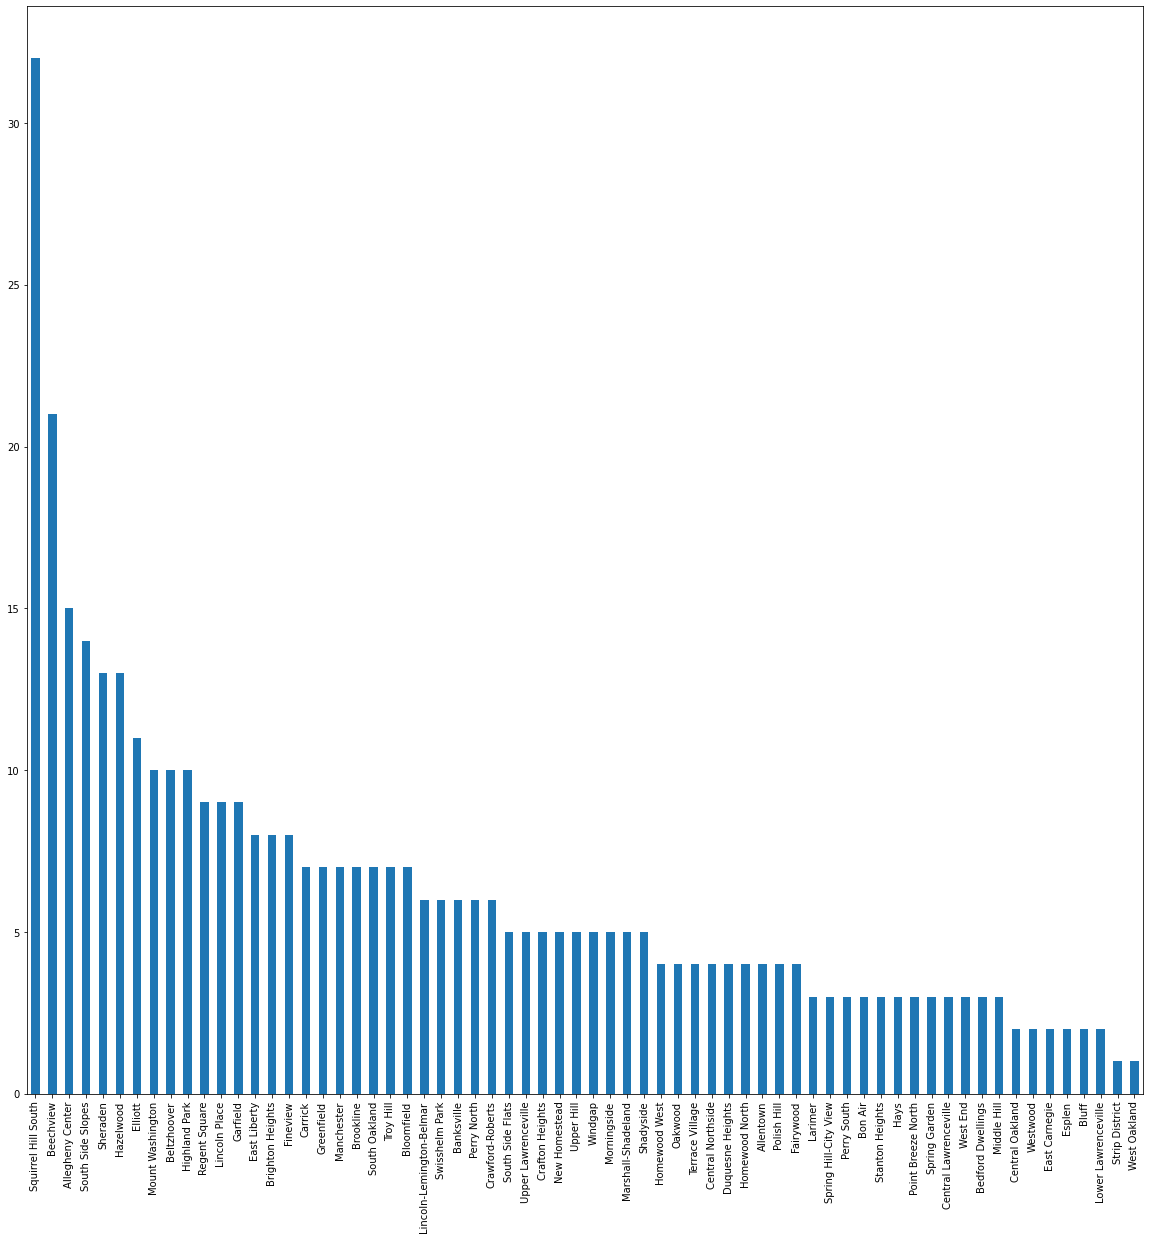

In [3]:
neighborhood.plot.bar(figsize=(20,20))

Testing for ADA approved

In [5]:
mask=play['ada_accessible']=='t'
ada=play[mask]
ada

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
10,1811257536,Cross and Strauss Playground,Swing 2 Bays,Little Tykes,Pour in Place,t,NaN,Cross St,Perry South,6,26,42003261400,1,26,1,1-12,40.465189,-80.020173
15,490747758,Dunbar Playground,Swing 2 Bays,Playworld,Pour in Place,t,1201.0,Clairhaven St,Crafton Heights,2,28,42003281500,5,28,6,1-18,40.439321,-80.051894
18,595152426,Fineview Playground,Swing 2 Bays,Playworld,Greenpark Breakfall,t,NaN,Fineview Ave,Fineview,1,25,42003250900,1,25,1,1-10,40.461713,-80.003621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,139686053,Riverview Playground,Swing 2 Bays,Playworld,SofSurfaces,t,NaN,Riverview Ave,Perry North,1,26,42003980400,1,26,1,1-15,40.481581,-80.018024
378,1907171006,Schenley Oval Playground,Swing 3 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.431106,-79.945099
380,332724058,Vietnam Veteran's Playground,Swing 3 Bays,Little Tykes,SofSurfaces,t,110.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434273,-79.944221
394,253354246,Fineview Playground,Swing 2 Bays,NaN,SofSurfaces,t,20.0,Edenvale St,Fineview,1,25,42003250900,1,25,1,1-10,40.461772,-80.003583


Messing with Data

In [6]:
##ada_neighborhood=ada.groupby("neighborhood").count()
ada['neighborhood'].value_counts().sort_values(ascending=False)

Squirrel Hill South         7
Beechview                   4
Elliott                     4
South Side Slopes           4
Sheraden                    3
Mount Washington            3
Highland Park               3
Manchester                  2
Crawford-Roberts            2
Hazelwood                   2
South Side Flats            2
Greenfield                  2
Beltzhoover                 2
Carrick                     2
Brighton Heights            2
Fineview                    2
Bloomfield                  2
Morningside                 2
East Liberty                2
Lincoln-Lemington-Belmar    2
Central Lawrenceville       1
Troy Hill                   1
Spring Garden               1
Stanton Heights             1
Bluff                       1
Regent Square               1
Marshall-Shadeland          1
Bon Air                     1
Bedford Dwellings           1
Homewood West               1
Terrace Village             1
Middle Hill                 1
Banksville                  1
Homewood N